In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from scipy.optimize import curve_fit

In [130]:
# Step 1: Load the CSV file
file_path = 'venice.csv'  # Replace with the path to your file
data = pd.read_csv(file_path)

# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])
#convert the 'waterArea' column to a float object
data['waterArea'] = data['waterArea'].astype(float)

# Group the data by year and calculate the yearly mean of waterArea
data['year'] = data['date'].dt.year
yearly_mean = data.groupby('year')['waterArea'].mean()

# Create an empty dictionary to store the mean of below-average waterArea for each year
below_avg_mean = {}

# Loop through each year, filter data below the mean, and calculate the mean for these values
for year in range(2020, 2025):
    # Filter data for the specific year
    yearly_data = data[data['year'] == year]
    # Get the yearly mean
    mean_value = yearly_mean.loc[year]
    # Filter rows where waterArea is below the yearly mean
    below_mean_data = yearly_data[yearly_data['waterArea'] < mean_value]
    # Calculate the mean of waterArea for these filtered rows
    below_avg_mean[year] = below_mean_data['waterArea'].mean()


{2020: np.float64(461.7572727272727),
 2021: np.float64(455.0968333333333),
 2022: np.float64(436.64125),
 2023: np.float64(454.6404285714286),
 2024: np.float64(472.20654545454545)}

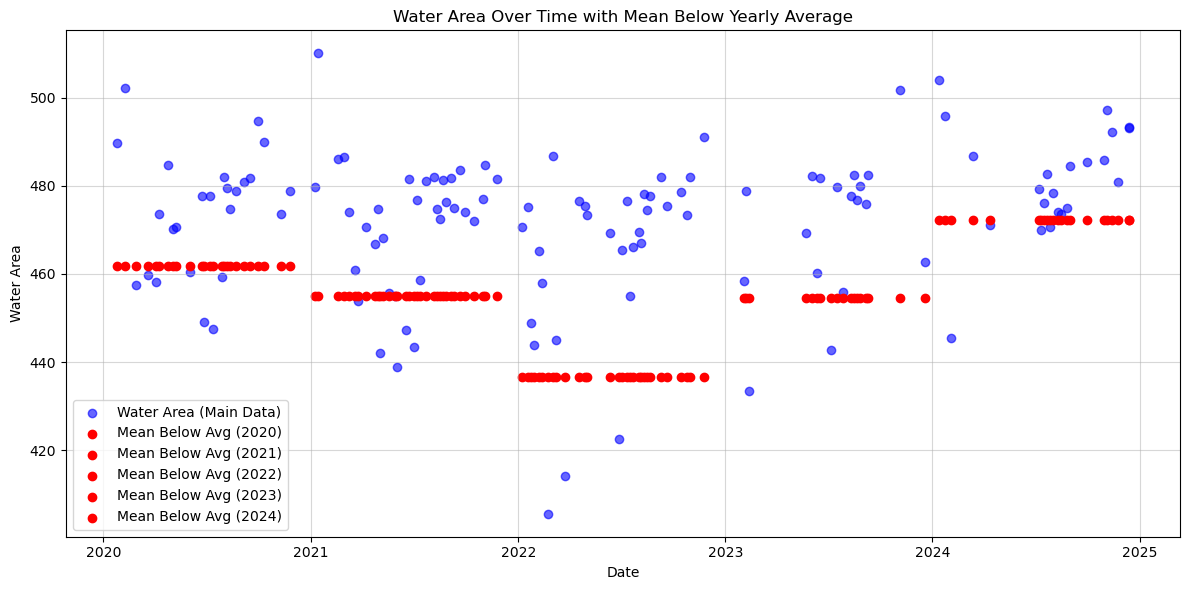

In [136]:
# Plot the full data
plt.figure(figsize=(12, 6))

# Plot the main data (blue points)
plt.scatter(data['date'], data['waterArea'], color='blue', label='Water Area (Main Data)', alpha=0.6)

# Plot the mean below the average for each year (red line as points)
for year in range(2020, 2025):
    # Get the dates and below-average mean value for this year
    year_data = data[data['year'] == year]
    below_mean_value = below_avg_mean[year]
    
    # Add red horizontal points for the mean below the yearly average
    plt.scatter(year_data['date'], [below_mean_value] * len(year_data), color='red', label=f'Mean Below Avg ({year})')

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Water Area')
plt.title('Water Area Over Time with Mean Below Yearly Average')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()


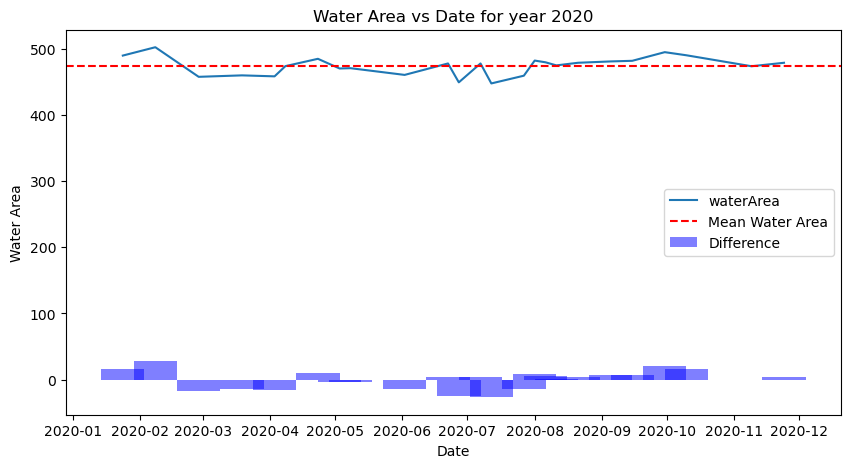

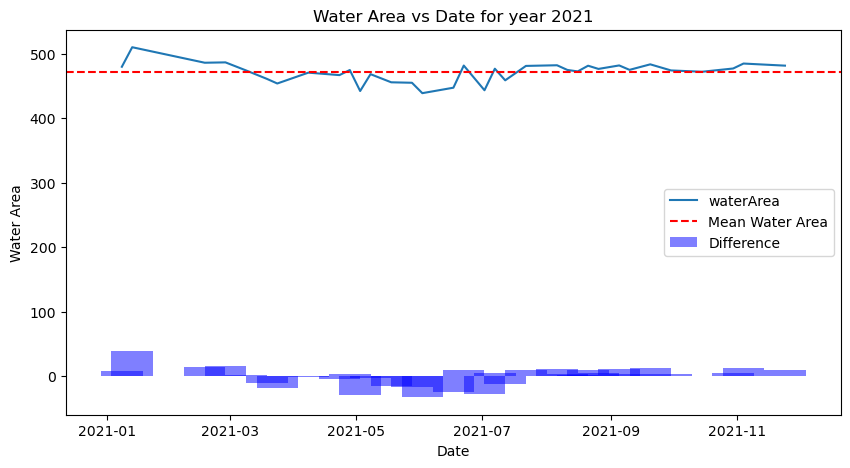

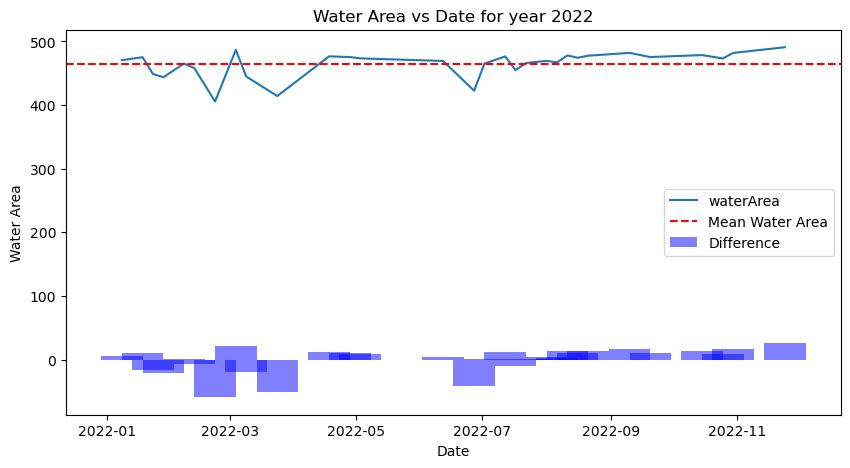

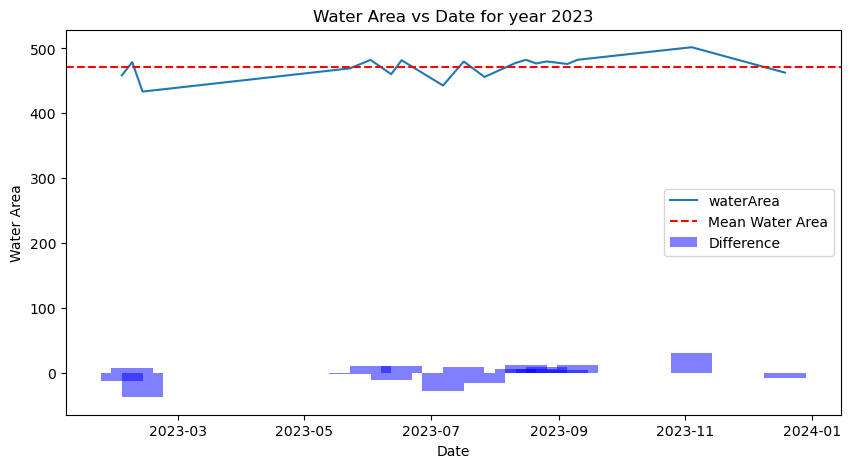

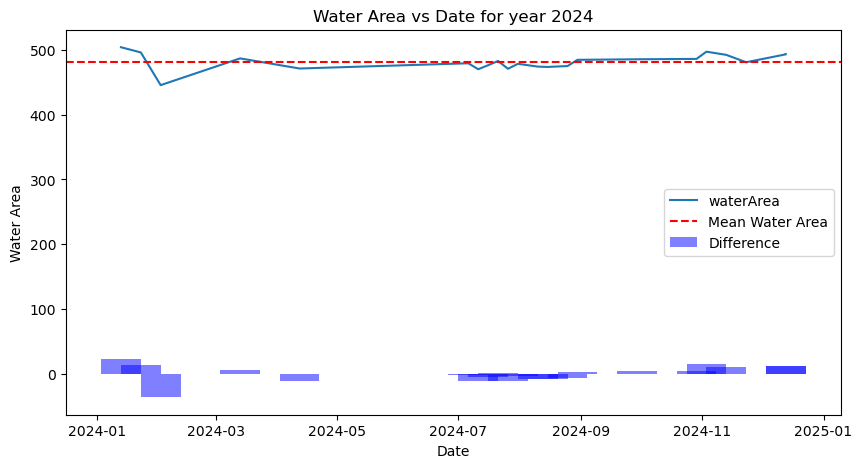

In [ ]:
# foe each year calculate the mean of water area
data_mean = data.groupby(data['date'].dt.year).mean()

#sub plot
for i in range(2020,2025):
    plt.figure(figsize=(10, 5))
    plt.plot(data[data['date'].dt.year == i]['date'], data[data['date'].dt.year == i]['waterArea'], label='waterArea')
    plt.axhline(y=data_mean.loc[i, 'waterArea'], color='r', linestyle='--', label='Mean Water Area')
    plt.bar(data[data['date'].dt.year == i]['date'], data[data['date'].dt.year == i]['waterArea'] - data_mean.loc[i, 'waterArea'], width=20, color='b', alpha=0.5, label='Difference')
    plt.xlabel('Date')
    plt.ylabel('Water Area')
    plt.title(f'Water Area vs Date for year {i}')
    plt.legend()
    plt.show()



In [125]:
data_mean

,date,waterArea
date,,
2020,2020-06-26 09:36:00.000000000,474.082160
2021,2021-06-22 03:31:45.882352896,471.411765
2022,2022-06-07 00:00:00.000000000,464.768700
2023,2023-07-08 22:40:00.000000000,471.221278
2024,2024-07-27 08:43:38.181818112,481.585364
